In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from wordcloud import WordCloud
%matplotlib inline

import pandas_profiling

In [3]:
df = pd.read_csv("D:/dataset/Sentiment analysis Data/Womens Clothing E-Commerce Reviews.CSV")

# This is a new pandas function that automatically outputs basic EDA template based of your data at specified location

In [5]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="womens Clothing E-Commerce Reviews.html")

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


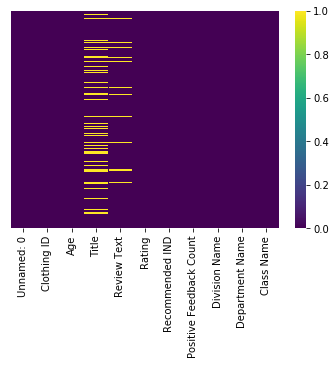

In [6]:
# yellow lines is showing missing data
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

# Removing NAN w.r.t Review Text 
* depends as per use case

In [7]:
df.dropna(subset=['Review Text'],inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,22641.0,11740.849035,6781.957509,0.0,5872.0,11733.0,17621.0,23485.0
Clothing ID,22641.0,919.332362,202.266874,1.0,861.0,936.0,1078.0,1205.0
Age,22641.0,43.280376,12.326980,18.0,34.0,41.0,52.0,99.0
Rating,22641.0,4.183561,1.115762,1.0,4.0,5.0,5.0,5.0
Recommended IND,22641.0,0.818868,0.385136,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,22641.0,2.630582,5.786164,0.0,0.0,1.0,3.0,122.0


In [12]:
# adding text len feature
def text_len(txt):
    txt = "".join(txt.split())
    return len(txt)

df["len"] = df["Review Text"].apply(lambda x: text_len(x))
df.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,len
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,104
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,186
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,167
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,342
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses,92


# There could be dublicates lets check

In [13]:
df_dublicates = pd.DataFrame()

In [16]:
df.duplicated(subset=["Review Text"]).value_counts()

False    22634
True         7
dtype: int64

# 7 dublicates found lets check

In [18]:
df_dublicates = df[df.duplicated(subset=["Review Text"])]

In [19]:
df_dublicates.head(7)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,len
10067,10067,1171,26,Love retailer bathing suits!,Perfect fit and i've gotten so many compliment...,5,1,0,Initmates,Intimate,Swim,67
11074,11074,628,60,Cute cover-up or summer top & shorts!,"Lightweight, soft cotton top and shorts. i thi...",5,1,2,Initmates,Intimate,Lounge,403
12526,12526,1081,42,"Beautiful dress, fits horribly",I purchased this and another eva franco dress ...,2,0,3,General,Dresses,Dresses,407
13354,13354,393,26,Love retailer bathing suits!,Perfect fit and i've gotten so many compliment...,5,1,0,Initmates,Intimate,Swim,67
14275,14275,879,43,Love this shirt,I bought this shirt at the store and after goi...,5,1,0,General Petite,Tops,Knits,274
21470,21470,895,60,Soft & beautiful!,The sweater and skirt are so pretty! they're r...,5,1,5,General Petite,Tops,Fine gauge,180
21888,21888,1022,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans,173


In [22]:
df_dublicates["Review Text"].iloc[6]

'Love, love these jeans. being short they come right to my ankle. super soft and don?t require any hemming. i ordered my typical jean size of 26 and they fit like a glove. would love to have these in black and grey.'

# lets confirm its occurace in original df

In [23]:
df[df["Review Text"]=="The sweater and skirt are so pretty! they're really soft and have such an easy, comfortable look together. really love this gorgeous outfit.\n\ni am borderline small/medium and kept the size small after trying both on."]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,len
16988,16988,993,60,Soft & beautiful!,The sweater and skirt are so pretty! they're r...,5,1,1,General,Bottoms,Skirts,180
21470,21470,895,60,Soft & beautiful!,The sweater and skirt are so pretty! they're r...,5,1,5,General Petite,Tops,Fine gauge,180


# yes so entry confirmed
* so as we are only intersed in Review VS Ratings i'll remove dubliate entries

In [25]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'len'],
      dtype='object')

In [26]:
df["Review Text"].count()

22641

In [27]:
df.drop_duplicates(subset="Review Text",keep='first',inplace=True)

# new df with removed dublicates

In [28]:
df["Review Text"].count()

22634

In [30]:
df.describe()
#df.describe().T

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,len
count,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000,22634.000000
mean,11739.856367,919.348546,43.280772,4.183441,0.818857,2.630953,249.129142
std,6782.320486,202.247459,12.326740,1.115761,0.385145,5.786929,115.469654
min,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000,8.000000
25%,5870.250000,861.000000,34.000000,4.000000,1.000000,0.000000,151.000000
50%,11731.500000,936.000000,41.000000,5.000000,1.000000,1.000000,243.000000
75%,17620.750000,1078.000000,52.000000,5.000000,1.000000,3.000000,370.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,426.000000


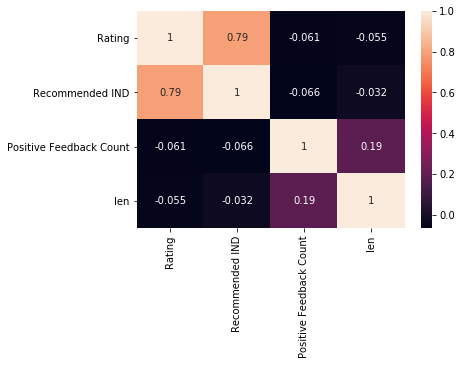

In [32]:
sns.heatmap(df[['Rating','Recommended IND', 'Positive Feedback Count','len']].corr(),annot=True)

# EDA  categorical

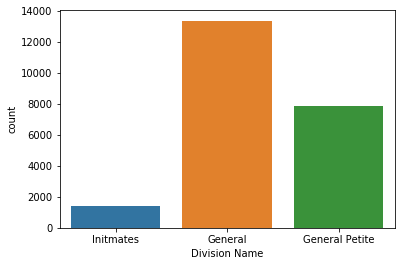

In [40]:
#'Division Name','Department Name', 'Class Name'
sns.countplot(df['Division Name'])

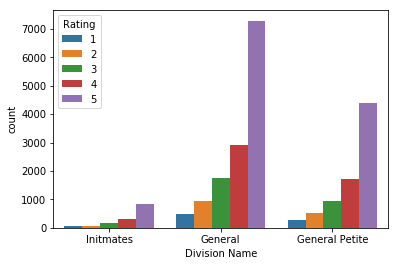

In [46]:
sns.countplot(df['Division Name'],hue=df["Rating"])

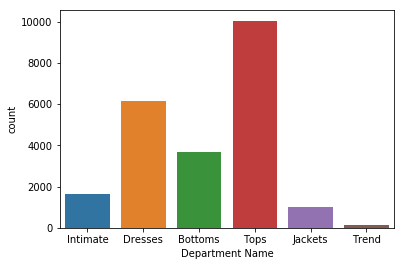

In [48]:
sns.countplot(df['Department Name'])

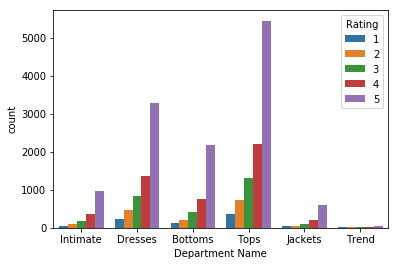

In [49]:
sns.countplot(df['Department Name'],hue=df["Rating"])

# Rating & Recommended IND closely correlated

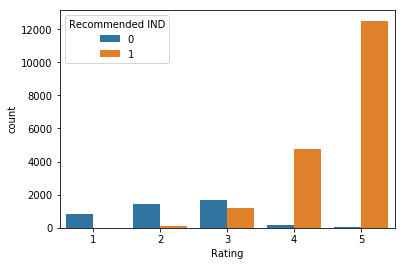

In [51]:
sns.countplot(df['Rating'],hue=df["Recommended IND"])

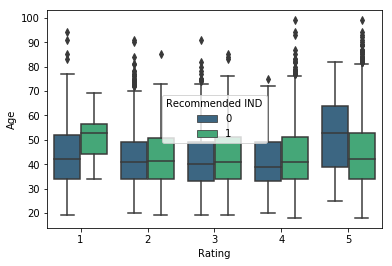

In [52]:
sns.boxplot(x = "Rating", y = "Age", hue="Recommended IND" ,data= df,palette="viridis")

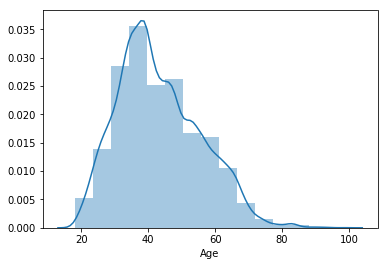

In [56]:
sns.distplot(df["Age"],bins=15)

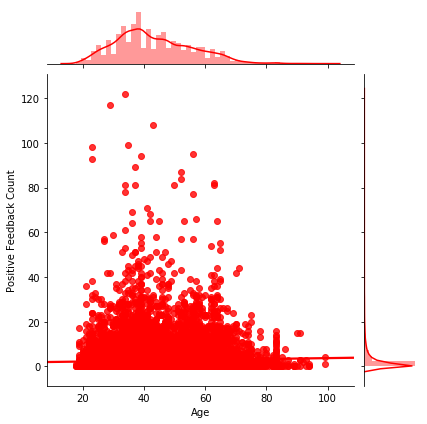

In [58]:
sns.jointplot(x=df["Age"],y=df["Positive Feedback Count"],kind='reg',color='r')

In [1]:
df["Recommended IND"].value_counts()

NameError: name 'df' is not defined

In [ ]:
#can include worcloud etc